In [1]:
from pixelbrain.database_processors.xgboost_processor import XGBoostRegressorTrainer, XGBoostDatabaseProcessor
from pixelbrain.database import Database
import os
import numpy as np
import pandas as pd


mongo_key=os.getenv("MONGO_URL")
db = Database(database_id="Selfyx", mongo_key=mongo_key)

data_field_names = [
    "cfg_scale",
    "pick_score",
    "similarity_score_nearest",
    "similarity_score_average_k_nearest",
    "similarity_score_maximum_distance",
    "generated_epoch"
]

metric_field_name = "human_rating"
field_names = data_field_names + [metric_field_name]
filters = { field_name: None for field_name in field_names }
data = db.find_images_with_filters(filters)
data_df = pd.DataFrame(data)
# Remove all columns starting with 'face_embedding'
columns_to_remove = [col for col in data_df.columns if col.startswith('face_embedding')]
data_df.drop(columns=columns_to_remove, inplace=True)

data_df


/Users/omerhacohen/ws/pixel-brain/venv/lib/python3.8/site-packages/pinecone/data/index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


,_id,session_id,image_type,generated_epoch,prompt,negative_prompt,generating_lora,denoising_strength,hr_upscaler,hr_steps,...,sample_steps,sampler_name,generation_time,prompt_name,pick_score,similarity_score_nearest,similarity_score_average_k_nearest,similarity_score_maximum_distance,human_rating,ranker_score
0,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.112318,10.883402,8.664208,16.783709,1,NaN
1,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.529348,10.886930,10.785277,17.518455,2,NaN
2,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.372534,11.901322,10.567776,18.091351,3,NaN
3,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.584103,12.438620,11.268615,19.436955,3,NaN
4,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.219236,10.084253,8.720528,15.824699,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,user_images/generated_images/demo/cc1bd453-7d1...,cc1bd453-7d12-4fac-b1a2-08bce9a298aa,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/cc1bd453-7d12-4fac-b1a2-08bce9a298a...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-21 17:19:26.369,Vanilla,18.461048,14.719535,15.156193,27.255566,1,0.279225
2570,user_images/generated_images/demo/cc1bd453-7d1...,cc1bd453-7d12-4fac-b1a2-08bce9a298aa,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/cc1bd453-7d12-4fac-b1a2-08bce9a298a...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-21 17:19:26.369,Vanilla,18.046453,17.879016,14.726505,30.296746,2,0.303685
2571,user_images/generated_images/demo/cc1bd453-7d1...,cc1bd453-7d12-4fac-b1a2-08bce9a298aa,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/cc1bd453-7d12-4fac-b1a2-08bce9a298a...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-21 17:19:26.369,Vanilla,19.146162,20.352850,18.116629,29.155370,2,0.250527
2572,user_images/generated_images/demo/cc1bd453-7d1...,cc1bd453-7d12-4fac-b1a2-08bce9a298aa,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/cc1bd453-7d12-4fac-b1a2-08bce9a298a...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-21 17:19:26.369,Vanilla,17.957262,23.476417,22.083104,33.465533,2,0.328977


In [2]:
grouped_data_df = data_df.sort_values(by=["session_id", metric_field_name], ascending=[True, False])
grouped_data_df.head()


,_id,session_id,image_type,generated_epoch,prompt,negative_prompt,generating_lora,denoising_strength,hr_upscaler,hr_steps,...,sample_steps,sampler_name,generation_time,prompt_name,pick_score,similarity_score_nearest,similarity_score_average_k_nearest,similarity_score_maximum_distance,human_rating,ranker_score
23,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.246197,10.811912,10.693267,18.019569,4,NaN
119,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,5,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.516113,9.929328,9.621855,16.683196,4,NaN
165,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.236839,11.920221,10.847804,19.298007,4,NaN
2,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.372534,11.901322,10.567776,18.091351,3,NaN
3,user_images/generated_images/demo/0e171f48-ff8...,0e171f48-ff8a-4b84-b9b8-532e85ceff5e,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/0e171f48-ff8a-4b84-b9b8-532e85ceff5...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-15 14:29:50.153,Vanilla,19.584103,12.438620,11.268615,19.436955,3,NaN


In [3]:
# Select only one session_id from the DataFrame
second_session = list(grouped_data_df.groupby("session_id").groups.keys())[3]
single_session_df = grouped_data_df[grouped_data_df['session_id'] == second_session]

single_session_df


,_id,session_id,image_type,generated_epoch,prompt,negative_prompt,generating_lora,denoising_strength,hr_upscaler,hr_steps,...,sample_steps,sampler_name,generation_time,prompt_name,pick_score,similarity_score_nearest,similarity_score_average_k_nearest,similarity_score_maximum_distance,human_rating,ranker_score
1336,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.272413,14.761252,12.137588,19.226810,4,NaN
1342,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.207554,13.612643,12.256823,19.172038,4,NaN
1347,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,3,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.325867,15.390324,13.806642,20.480853,4,NaN
1376,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,4,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.312447,15.412905,12.202438,19.883908,4,NaN
1393,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,5,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.021688,15.359896,15.299549,22.025008,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.108603,12.702873,11.104479,19.435086,1,NaN
1450,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.358068,15.517626,15.252771,22.264085,1,NaN
1451,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.431513,14.959610,15.196272,22.196010,1,NaN
1452,user_images/generated_images/demo/2cb1c596-aef...,2cb1c596-aefa-42aa-925d-3ce2da81042b,GENERATED,6,"RAW photo, beautiful portrait image of ohwx ma...","(deformed eyes, deformed iris, deformed pupils...",user_loras/2cb1c596-aefa-42aa-925d-3ce2da81042...,0.65,Latent,20,...,25,DPM++ SDE,2024-05-16 21:19:00.854,Vanilla,19.223906,14.390870,13.142874,19.777796,1,NaN


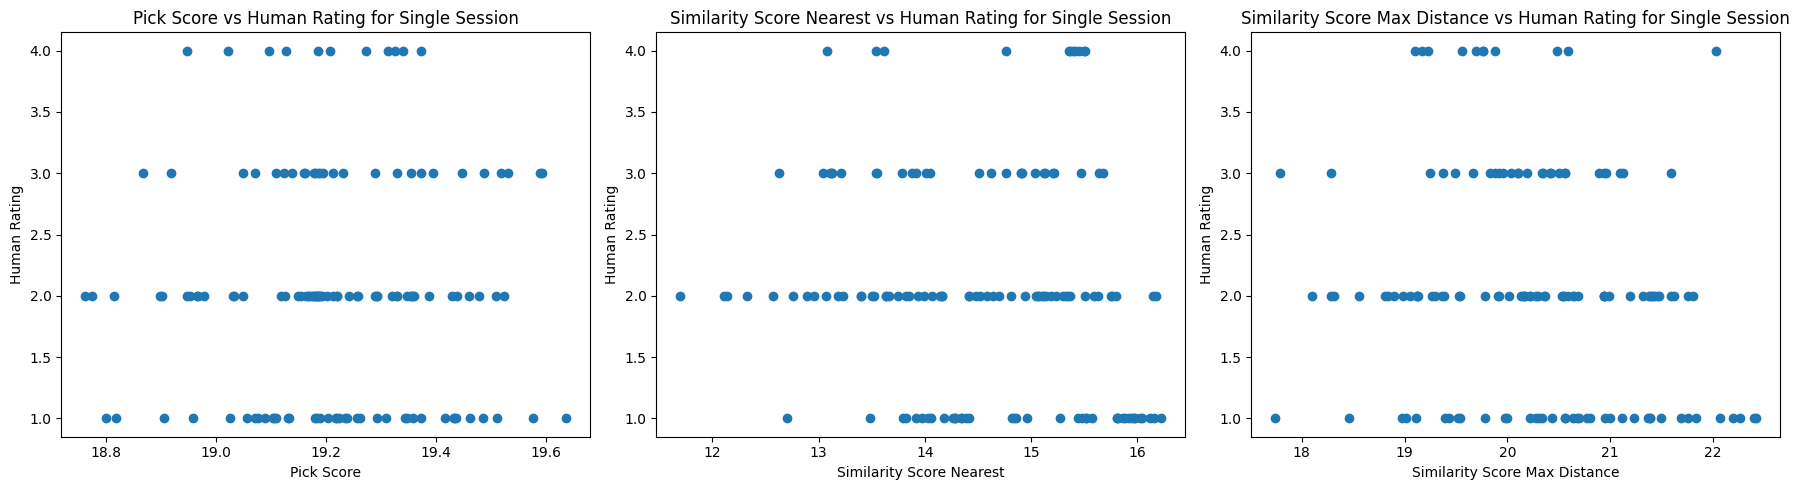

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot pick_score against human_rating in the single session DataFrame
axs[0].scatter(single_session_df['pick_score'], single_session_df['human_rating'])
axs[0].set_title('Pick Score vs Human Rating for Single Session')
axs[0].set_xlabel('Pick Score')
axs[0].set_ylabel('Human Rating')

# Plot similarity_score_nearest against human_rating in the single session DataFrame
axs[1].scatter(single_session_df['similarity_score_nearest'], single_session_df['human_rating'])
axs[1].set_title('Similarity Score Nearest vs Human Rating for Single Session')
axs[1].set_xlabel('Similarity Score Nearest')
axs[1].set_ylabel('Human Rating')

# Plot similarity_score_maximum_distance against human_rating in the single session DataFrame
axs[2].scatter(single_session_df['similarity_score_maximum_distance'], single_session_df['human_rating'])
axs[2].set_title('Similarity Score Max Distance vs Human Rating for Single Session')
axs[2].set_xlabel('Similarity Score Max Distance')
axs[2].set_ylabel('Human Rating')

plt.tight_layout()
plt.show()


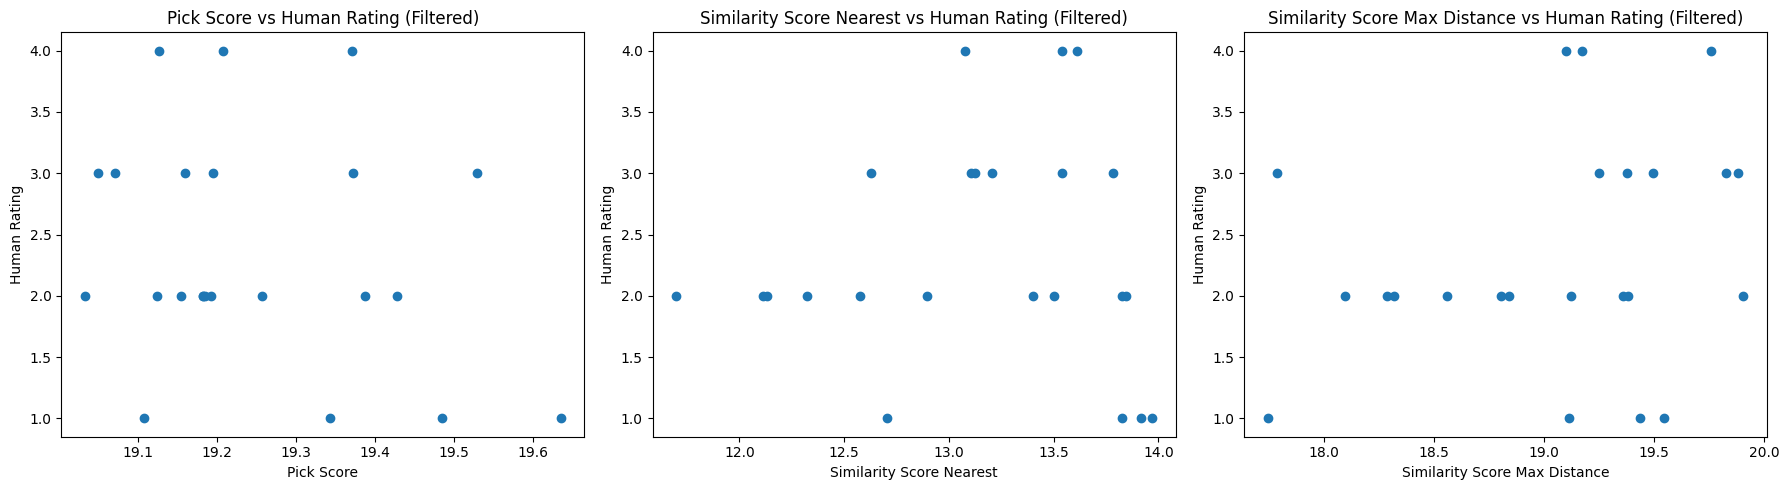

In [5]:
# Filter the DataFrame based on the given conditions
filtered_df = single_session_df[
    (single_session_df['pick_score'] > 19) &
    (single_session_df['similarity_score_nearest'] < 14) &
    (single_session_df['similarity_score_maximum_distance'] < 20)
]

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot pick_score against human_rating in the filtered DataFrame
axs[0].scatter(filtered_df['pick_score'], filtered_df['human_rating'])
axs[0].set_title('Pick Score vs Human Rating (Filtered)')
axs[0].set_xlabel('Pick Score')
axs[0].set_ylabel('Human Rating')

# Plot similarity_score_nearest against human_rating in the filtered DataFrame
axs[1].scatter(filtered_df['similarity_score_nearest'], filtered_df['human_rating'])
axs[1].set_title('Similarity Score Nearest vs Human Rating (Filtered)')
axs[1].set_xlabel('Similarity Score Nearest')
axs[1].set_ylabel('Human Rating')

# Plot similarity_score_maximum_distance against human_rating in the filtered DataFrame
axs[2].scatter(filtered_df['similarity_score_maximum_distance'], filtered_df['human_rating'])
axs[2].set_title('Similarity Score Max Distance vs Human Rating (Filtered)')
axs[2].set_xlabel('Similarity Score Max Distance')
axs[2].set_ylabel('Human Rating')

plt.tight_layout()
plt.show()


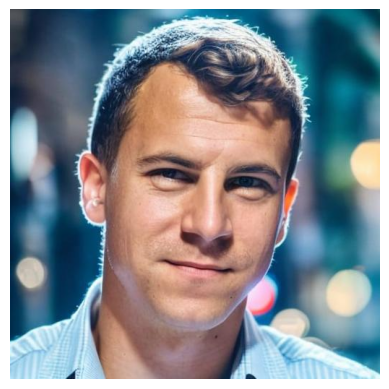

In [6]:

filtered_df[["_id", "human_rating"]]

def display_image_from_cloudinary(public_id):
    import cloudinary
    import cloudinary.uploader
    import cloudinary.api
    from PIL import Image
    from io import BytesIO
    import requests

    image_url = cloudinary.CloudinaryImage(public_id).build_url()
    
    from IPython.display import display
    import matplotlib.pyplot as plt

    # Download the image
    response = requests.get(image_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Failed to retrieve image. Status code: {response.status_code}")

pub_id = filtered_df["_id"].iloc[2]
display_image_from_cloudinary(pub_id)

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score

# Assuming single_session_df is already defined and contains the necessary data
X = single_session_df[data_field_names]
y = single_session_df[metric_field_name]

# Split the data into training and testing sets
X_train_features, X_test_features, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost regressor with rank objective
xgb_regressor = XGBRegressor(objective='rank:ndcg', eval_metric='ndcg')

# Fit the model
xgb_regressor.fit(X_train_features, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test_features)

# Calculate the NDCG score
ndcg = ndcg_score([y_test], [y_pred])
print(f"NDCG Score: {ndcg}")


NDCG Score: 0.9033573693409259


In [8]:
for pred, real in zip(y_pred, y_test):
    print(f"Pred: {pred}, Real: {real}")


Pred: -0.4696865677833557, Real: 1
Pred: -0.9773311614990234, Real: 2
Pred: -0.8695163130760193, Real: 1
Pred: -1.1432191133499146, Real: 3
Pred: -1.3305623531341553, Real: 2
Pred: -1.7942887544631958, Real: 2
Pred: 0.32506901025772095, Real: 3
Pred: -1.1461352109909058, Real: 1
Pred: -1.5581564903259277, Real: 1
Pred: -1.508156180381775, Real: 1
Pred: -0.9317882061004639, Real: 2
Pred: -0.5332798361778259, Real: 2
Pred: 1.2296180725097656, Real: 3
Pred: -1.3848838806152344, Real: 2
Pred: -0.6696000099182129, Real: 2
Pred: -0.9275718927383423, Real: 3
Pred: -0.38113582134246826, Real: 2
Pred: -1.6125885248184204, Real: 4
Pred: -0.4998999834060669, Real: 2
Pred: 0.0923621729016304, Real: 1
Pred: -0.0012612473219633102, Real: 2
Pred: -2.3001184463500977, Real: 3
Pred: -1.136116623878479, Real: 3
Pred: 0.05059593543410301, Real: 3
Pred: 1.191543698310852, Real: 4
Pred: -1.173427939414978, Real: 1
Pred: 0.3644276261329651, Real: 2
Pred: -1.0085316896438599, Real: 3
Pred: -1.157671570777893

In [9]:
pairs = list(zip(y_pred, y_test))
pairs.sort(key=lambda x: x[0])
for pred, real in pairs:
    print(f"Pred: {pred}, Real: {real}")



Pred: -2.3001184463500977, Real: 3
Pred: -2.2890424728393555, Real: 1
Pred: -1.893244981765747, Real: 2
Pred: -1.7942887544631958, Real: 2
Pred: -1.6125885248184204, Real: 4
Pred: -1.5581564903259277, Real: 1
Pred: -1.508156180381775, Real: 1
Pred: -1.446885347366333, Real: 3
Pred: -1.3848838806152344, Real: 2
Pred: -1.3305623531341553, Real: 2
Pred: -1.1759215593338013, Real: 2
Pred: -1.173427939414978, Real: 1
Pred: -1.157671570777893, Real: 2
Pred: -1.1461352109909058, Real: 1
Pred: -1.1461352109909058, Real: 2
Pred: -1.1432191133499146, Real: 3
Pred: -1.136116623878479, Real: 3
Pred: -1.0085316896438599, Real: 3
Pred: -0.9873013496398926, Real: 3
Pred: -0.9773311614990234, Real: 2
Pred: -0.9317882061004639, Real: 2
Pred: -0.9275718927383423, Real: 3
Pred: -0.8909030556678772, Real: 4
Pred: -0.8695163130760193, Real: 1
Pred: -0.8515728712081909, Real: 1
Pred: -0.7931850552558899, Real: 2
Pred: -0.7000550627708435, Real: 3
Pred: -0.6696000099182129, Real: 2
Pred: -0.5332798361778259,

In [10]:
pred_y_train = xgb_regressor.predict(X_train_features)
for pred, real in zip(pred_y_train, y_train):
    print(f"Pred: {pred}, Real: {real}")



Pred: -0.3851553797721863, Real: 2
Pred: -0.5534281134605408, Real: 2
Pred: -1.0676590204238892, Real: 3
Pred: -1.3848838806152344, Real: 1
Pred: -1.5216172933578491, Real: 2
Pred: -0.6649622321128845, Real: 1
Pred: -0.005158904939889908, Real: 3
Pred: -1.353512167930603, Real: 1
Pred: -0.26470819115638733, Real: 2
Pred: 2.4801180362701416, Real: 4
Pred: -0.9121761322021484, Real: 3
Pred: -0.9550754427909851, Real: 2
Pred: 0.47772252559661865, Real: 3
Pred: -2.0762124061584473, Real: 2
Pred: -0.6183905005455017, Real: 3
Pred: -0.5217882990837097, Real: 1
Pred: -0.5982860922813416, Real: 2
Pred: -1.2631064653396606, Real: 1
Pred: -1.1590113639831543, Real: 2
Pred: 1.539116621017456, Real: 4
Pred: -0.4782159626483917, Real: 2
Pred: -2.016658306121826, Real: 2
Pred: 0.0007514609023928642, Real: 2
Pred: -1.9626795053482056, Real: 2
Pred: -1.8000744581222534, Real: 3
Pred: -1.7018921375274658, Real: 3
Pred: -0.8479664921760559, Real: 2
Pred: 1.9339449405670166, Real: 4
Pred: -1.089917421340

In [11]:
pairs = list(zip(pred_y_train, y_train))
pairs.sort(key=lambda x: x[0])
for pred, real in pairs:
    print(f"Pred: {pred}, Real: {real}")

Pred: -2.3001184463500977, Real: 2
Pred: -2.1657702922821045, Real: 2
Pred: -2.1373562812805176, Real: 2
Pred: -2.0762124061584473, Real: 2
Pred: -2.073307514190674, Real: 2
Pred: -2.0283610820770264, Real: 2
Pred: -2.016658306121826, Real: 2
Pred: -1.9976692199707031, Real: 2
Pred: -1.9957842826843262, Real: 1
Pred: -1.9626795053482056, Real: 2
Pred: -1.9107648134231567, Real: 1
Pred: -1.84498929977417, Real: 2
Pred: -1.8000744581222534, Real: 3
Pred: -1.707566499710083, Real: 2
Pred: -1.707566499710083, Real: 2
Pred: -1.7018921375274658, Real: 3
Pred: -1.6925753355026245, Real: 3
Pred: -1.6384727954864502, Real: 1
Pred: -1.6326452493667603, Real: 1
Pred: -1.594864845275879, Real: 2
Pred: -1.574409008026123, Real: 1
Pred: -1.5408343076705933, Real: 1
Pred: -1.5216172933578491, Real: 2
Pred: -1.4741358757019043, Real: 1
Pred: -1.4501979351043701, Real: 1
Pred: -1.3848838806152344, Real: 1
Pred: -1.3848838806152344, Real: 1
Pred: -1.353512167930603, Real: 1
Pred: -1.2694076299667358, Re

In [12]:
from xgboost import XGBRanker
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import ndcg_score
import pandas as pd

# Assuming single_session_df is already defined and contains the necessary data
X = grouped_data_df
y = grouped_data_df[metric_field_name]
session_ids = grouped_data_df['session_id']

# Split the data into training and testing sets without splitting sessions
gss = GroupShuffleSplit(test_size=0.1, n_splits=1, random_state=22).split(X, y, groups=session_ids)
train_idx, test_idx = next(gss)

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
session_train, session_test = session_ids.iloc[train_idx], session_ids.iloc[test_idx]
train_group_sizes = X_train.groupby('session_id').size().to_numpy()
test_group_sizes = X_test.groupby('session_id').size().to_numpy()
X_train_features= X_train[data_field_names]
X_test_features = X_test[data_field_names]
print("Train group sizes:", train_group_sizes)
print("Test group sizes:", test_group_sizes)
print(set(session_train).intersection(set(session_test)))


Train group sizes: [191 190 186 134 188 186 186 157 188 192 192  18 191]
Test group sizes: [183 192]
set()


In [13]:
# Define the XGBoost regressor with rank objective
xgb_regressor = XGBRanker(objective='rank:ndcg', eval_metric='ndcg')

# Fit the model
xgb_regressor.fit(X_train_features, y_train, group=train_group_sizes, verbose=True)

# Make predictions
y_pred = xgb_regressor.predict(X_test_features)

# Calculate the NDCG score for each session group
ndcg_scores = []
for session_id in session_test.unique():
    session_mask = session_test == session_id
    print(f'len session_mask: {len(session_mask)}')
    print(f'len y_test: {len(y_test)}')
    print(f'len y_pred: {len(y_pred)}')
    y_true_masked = y_test[session_mask]
    y_pred_masked = y_pred[session_mask]
    ndcg = ndcg_score([y_true_masked], [y_pred_masked])
    ndcg_scores.append(ndcg)
    print(f"Session {session_id} NDCG Score: {ndcg}")
    pairs = list(zip(y_pred_masked, y_true_masked))
    pairs.sort(key=lambda x: x[0])
    for pred, real in pairs[-5:]:
        print(f"Pred: {pred}, Real: {real}")

# Calculate the average NDCG score across all sessions
average_ndcg = sum(ndcg_scores) / len(ndcg_scores)
print(f"Average NDCG Score: {average_ndcg}")


len session_mask: 375
len y_test: 375
len y_pred: 375
Session 8c49ca14-2034-4508-819d-95abd88fc113 NDCG Score: 0.8961006371200262
Pred: 0.28657248616218567, Real: 2
Pred: 0.34469401836395264, Real: 2
Pred: 0.4492865800857544, Real: 2
Pred: 0.46393510699272156, Real: 3
Pred: 0.4962669312953949, Real: 2
len session_mask: 375
len y_test: 375
len y_pred: 375
Session f32b4df1-5abc-4d7f-b5eb-1d95480b2117 NDCG Score: 0.900557712382883
Pred: 0.3773030936717987, Real: 2
Pred: 0.4532918334007263, Real: 3
Pred: 0.6739857792854309, Real: 3
Pred: 0.8158921003341675, Real: 1
Pred: 0.9413146376609802, Real: 2
Average NDCG Score: 0.8983291747514546


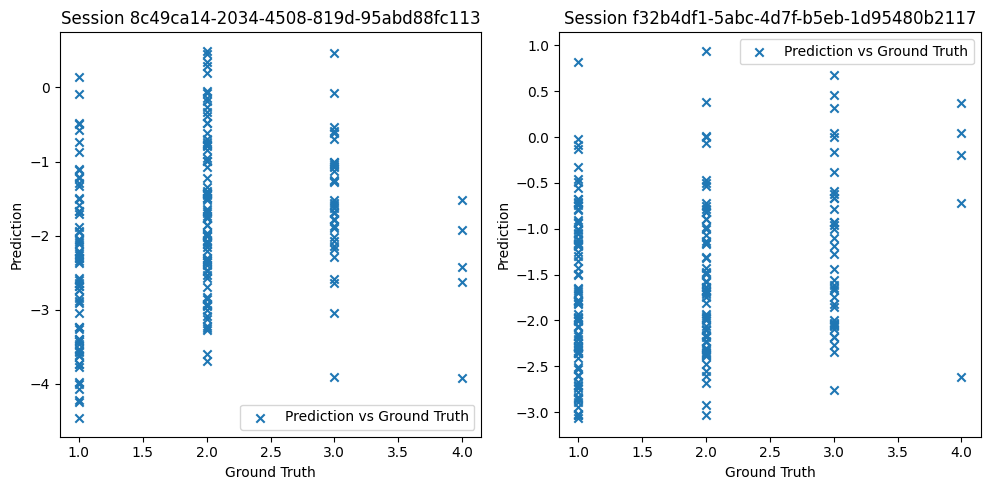

In [14]:
import matplotlib.pyplot as plt

# Plot predictions vs ground truth for each test session
unique_sessions = session_test.unique()
num_sessions = len(unique_sessions)
num_cols = 3
num_rows = (num_sessions + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, session_id in enumerate(unique_sessions):
    session_mask = session_test == session_id
    y_true_masked = y_test[session_mask]
    y_pred_masked = y_pred[session_mask]
    
    ax = axes[i]
    ax.scatter(y_true_masked.values, y_pred_masked, label='Prediction vs Ground Truth', marker='x')
    ax.set_title(f'Session {session_id}')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Prediction')
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
import copy
from sklearn.base import BaseEstimator


class XgboostRankerWrapper(BaseEstimator):
    def __init__(
        self,
        objective="rank:ndcg",
        max_depth=6,
        learning_rate=0.3,
        n_estimators=300,
        subsample=0.9,
        colsample_bytree=0.8,
        colsample_bylevel=0.8,
        gamma=0,
        min_child_weight=1,
        n_jobs=-1,
    ):
        """
        Wrapper for XGBRanker model that can be used in a scikit-learn pipeline.

        Parameters:
        -----------
        objective: str
            XGBoost objective to use for training the model, defaults to 'rank:pairwise'.
        learning_rate: float
            Learning rate of the XGBoost model, defaults to 0.1.
        gamma: float
            Minimum loss reduction required to make a further partition on a leaf node of the tree, defaults to 5.0.
        n_jobs: int
            Number of CPU cores to use for training the model, defaults to -1 (all available cores).
        max_depth: int
            Maximum depth of the trees in the XGBoost model, defaults to 5.
        n_estimators: int
            Number of trees to build in the XGBoost model, defaults to 20.
        """
        self.objective = objective
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.subsample = subsample
        self.colsample_bytree = colsample_bytree
        self.colsample_bylevel = colsample_bylevel
        self.gamma = gamma
        self.min_child_weight = min_child_weight
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        """
        Fits the XGBoostRanker model to the training data.

        Parameters:
        -----------
        X: pandas.DataFrame
            Training input data, where the last column should be the query ID.
        y: numpy.array
            Training target labels.

        Returns:
        --------
        self: object
            Returns the instance itself.
        """

        self.model = XGBRanker(
            objective=self.objective,
            learning_rate=self.learning_rate,
            n_jobs=self.n_jobs,
            max_depth=self.max_depth,
            n_estimators=self.n_estimators,
            subsample=self.subsample,
            colsample_bytree=self.colsample_bytree,
            colsample_bylevel=self.colsample_bylevel,
        )

        try:
            group_sizes = X.groupby("session_id").size().to_numpy()
        except Exception as e:
            print(f"Fix here in fit: {str(e)}")
            raise e

        # Fit the XGBoostRanker model to the training data
        self.model.fit(
            X.drop(columns=["session_id"]), y, group=group_sizes, verbose=True
        )

        return self

    def predict(self, X, y=None):
        """
        Generates predictions for the input data X.

        Parameters:
        -----------
        X: pandas.DataFrame
            Input data for which predictions should be generated, where the last column should be the query ID.
        y: numpy.array
            Training target labels.

        Returns:
        --------
        df: pandas.DataFrame
            Dataframe containing the query ID and predicted scores for each record in X.
        """

        try:
            # Extract qid
            qids = X["session_id"].values
            # Discard last feature which is qid while making predictions
            preds = self.model.predict(X.drop(columns=["session_id"]))
        except Exception as e:
            print(f"Fix here in predict: {str(e)}")
            raise e
        # Create a dataframe with the query ID and predicted scores for each record in X
        df = pd.DataFrame(list(zip(qids, preds)), columns=["session_id", "score"])
        return df


def mean_ndcg_score(y_true, y_pred):
    ndcg_scores = []
    session_ids = y_pred["session_id"]
    y_true = y_true.reset_index(drop=True)
    y_pred = y_pred.reset_index(drop=True)
    for session_id in session_ids.unique():
        session_mask = session_ids == session_id
        y_true_masked = y_true[session_mask]
        y_pred_masked = y_pred[session_mask]
        ndcg = ndcg_score([y_true_masked], [y_pred_masked["score"]])
        ndcg_scores.append(ndcg)
        

    average_ndcg = sum(ndcg_scores) / len(ndcg_scores)
    return average_ndcg

In [16]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer
from sklearn.model_selection import GroupKFold

# Define the parameter grid
param_grid = {
    "max_depth": [3, 6, 9],
    "learning_rate": [0.005, 0.01, 0.05],
    "n_estimators": [200, 300, 400],
    "subsample": [0.7, 0.9, 0.95],
    "colsample_bytree": [0.3, 0.4, 0.6],
    "colsample_bylevel": [0.1, 0.2, 0.3],
    "gamma": [0],
    "min_child_weight": [1],
}

# Initialize the XGBRanker
xgb_ranker = XgboostRankerWrapper()

kgf = GroupKFold(n_splits=5)
sessions = X_train["session_id"].values
gk_splits = kgf.split(X_train, y_train, groups=sessions)

# Custom scorer for NDCG
ndcg_scorer = make_scorer(mean_ndcg_score, greater_is_better=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_ranker,
    param_grid=param_grid,
    cv=gk_splits,
    scoring=ndcg_scorer,
    verbose=1,
    n_jobs=-1,
)

X_train_features = X_train[data_field_names + ["session_id"]]

# Fit the grid search
grid_search.fit(X_train_features, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.4, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Best score: 0.9087050595356283


In [17]:
X_test_features = X_test[data_field_names + ["session_id"]]

test_preds = grid_search.best_estimator_.predict(X_test_features)
print(mean_ndcg_score(y_test, test_preds))



0.9057164212214514


In [25]:
pairs = list(zip(test_preds["score"], y_test, test_preds["session_id"]))
pairs.sort(key=lambda x: (x[2], x[0]), reverse=True)
for pred, gt, session_id in pairs:
    print(f"GT: {gt}, Pred: {pred}, Session ID: {session_id}")



GT: 3, Pred: 0.23102650046348572, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 3, Pred: 0.22047249972820282, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 1, Pred: 0.21802109479904175, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 3, Pred: 0.13798780739307404, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 2, Pred: 0.12608979642391205, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 1, Pred: 0.12374347448348999, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 2, Pred: 0.11999639868736267, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 3, Pred: 0.10748714953660965, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 4, Pred: 0.10232433676719666, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 4, Pred: 0.08931177854537964, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 3, Pred: 0.07689301669597626, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 4, Pred: 0.07369076460599899, Session ID: f32b4df1-5abc-4d7f-b5eb-1d95480b2117
GT: 

In [ ]:
import matplotlib.pyplot as plt

# Extract the metric values
metric_values = np.array([record[metric_field_name] for record in data])
nof_metrics_more_then_4 = np.sum(np.where(metric_values >= 4, 1, 0))
# Plot the histogram
plt.hist(metric_values, bins=20, edgecolor='black')
plt.title(f'Histogram of Human Ratings\n(Total data points: {len(metric_values)}), above 4: {nof_metrics_more_then_4}')
plt.xlabel('Human Rating')
plt.ylabel('Frequency')
plt.show()



In [ ]:
predictor = XGBoostDatabaseProcessor(db, data_field_names, model_path="xgboost_rating_model.pkl")

def plot_predictor_histogram(predictor):
    prep_data = predictor.get_prepared_data()
    predictions = predictor.predict(prep_data)

    # Calculate the total number of datapoints and the number of datapoints above 4 rating
    total_datapoints = len(predictions)
    datapoints_above_4 = np.sum(predictions >= 4)

    # Plot the histogram
    plt.hist(predictions, bins=20, edgecolor='black')
    plt.title(f'Histogram of Model Ratings\nTotal: {total_datapoints}, Above 4: {datapoints_above_4}')
    plt.xlabel('Model Rating')
    plt.ylabel('Frequency')
    plt.show()

plot_predictor_histogram(predictor)

In [ ]:
import matplotlib.pyplot as plt

def plot_test_preds(test_preds):
    # Extract predictions and targets from test_preds
    predictions = [item['prediction'] for item in test_preds]
    targets = [item['target'] for item in test_preds]

    # Create a scatter plot of predictions against targets
    plt.scatter(targets, predictions, alpha=0.5, edgecolors='k')
    plt.title('Test Predictions vs Targets')
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'r--')  # Line y=x for reference
    plt.show()
plot_test_preds(test_preds)
